<a href="https://colab.research.google.com/github/brainardsamuel/brainardsamuel.github.io/blob/master/facedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

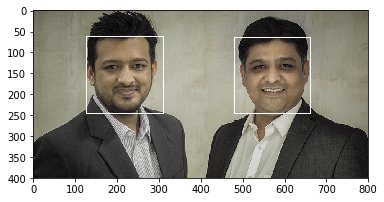

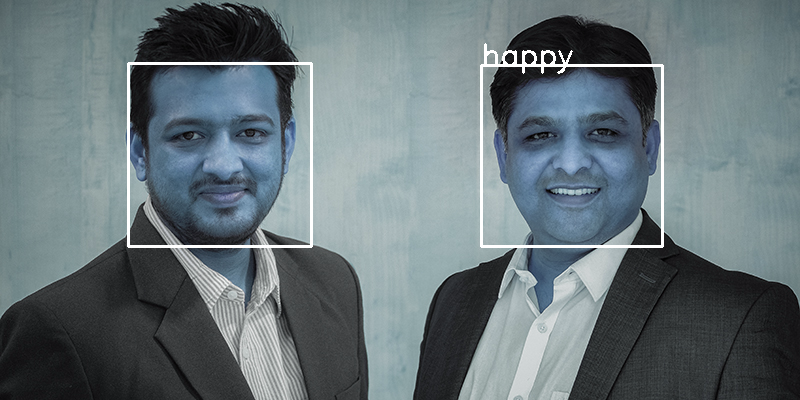

In [0]:

import cv2
from skimage.io import imread
from pylab import *
from keras.preprocessing import image
from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = imread('test.jpg')
#figure()
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output


#figure()
imshow(img)
plt.show()

#cv2.imshow('img', img)
cv2.waitKey()






detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48





from keras.models import model_from_json
model = model_from_json(open("facial_expression_model_structure.json", "r").read())
model.load_weights('facial_expression_model_weights.h5') #load weights




img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)
 
#find max indexed array
max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
emotion = emotions[max_index]
 
cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (1,1,1), 2)
cv2.resize(img,(150,150))
cv2_imshow(img)